In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("lab3.csv")

In [3]:
df.head()

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,00601,-66.749472,18.180103,70.0,19143,9888,3.24
1,00602,-67.180247,18.363285,83.0,42042,11384,3.10
2,00603,-67.134224,18.448619,86.0,55592,10748,2.84
3,00604,-67.136995,18.498987,83.0,3844,31199,3.00
4,00606,-66.958807,18.182151,65.0,6449,9243,3.20


In [4]:
df.describe()

,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
count,33178.000000,33178.000000,32165.000000,33178.000000,33178.000000,33178.000000
mean,-91.084343,38.830389,50.500016,8596.977395,38248.093857,2.500710
std,15.070689,5.359397,28.865519,12978.758221,17469.135891,0.595747
min,-176.636755,17.962234,1.000000,0.000000,0.000000,0.000000
25%,-97.219483,35.383955,26.000000,656.000000,28903.750000,2.360000
50%,-88.308757,39.460478,51.000000,2515.000000,35762.000000,2.550000
75%,-80.380665,42.105602,75.000000,11167.500000,45229.250000,2.740000
max,-65.292575,71.299525,100.000000,144024.000000,200001.000000,8.490000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        33178 non-null  object 
 1   LocX      33178 non-null  float64
 2   LocY      33178 non-null  float64
 3   RegDens   32165 non-null  float64
 4   RegPop    33178 non-null  int64  
 5   MedHHInc  33178 non-null  int64  
 6   MeanHHSz  33178 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB


In [6]:
df[df['RegDens'].isna()]

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
44,006HH,-66.834528,18.473441,NaN,0,0,0.0
45,006XX,-67.888030,18.102537,NaN,0,0,0.0
90,007HH,-66.014594,17.981672,NaN,0,0,0.0
91,007XX,-66.555461,17.962234,NaN,0,0,0.0
129,009HH,-66.066533,18.435287,NaN,0,0,0.0
...,...,...,...,...,...,...,...
32982,995HH,-146.936739,61.198519,NaN,0,0,0.0
33070,996HH,-150.464881,59.724281,NaN,0,0,0.0
33146,997HH,-141.176807,64.815413,NaN,0,0,0.0
33162,998HH,-134.522022,58.544293,NaN,0,0,0.0


In [7]:
# RegDens already in data type float with NaN  (Not empty string)

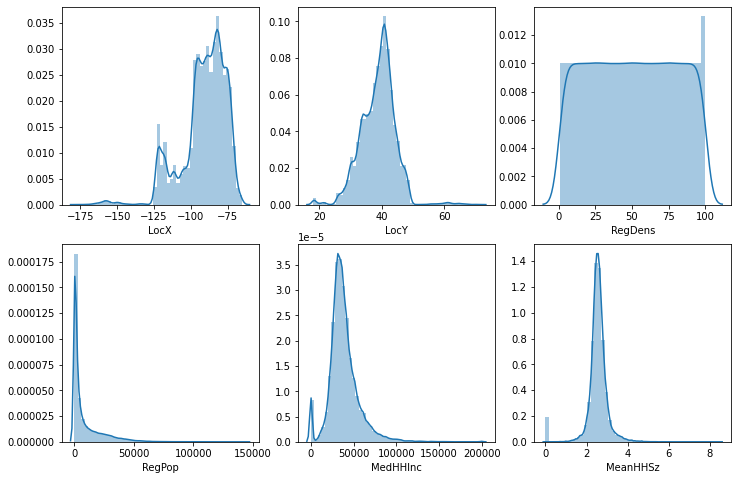

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.distplot(df['LocX'], ax=axes[0, 0])
sns.distplot(df['LocY'], ax=axes[0, 1])
sns.distplot(df['RegDens'], ax=axes[0, 2])
sns.distplot(df['RegPop'], ax=axes[1, 0])
sns.distplot(df['MedHHInc'], ax=axes[1, 1])
sns.distplot(df['MeanHHSz'], ax=axes[1, 2])

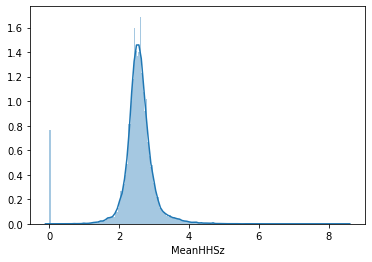

In [9]:
sns.distplot(df['MeanHHSz'], bins=200)

In [10]:
df['MeanHHSz'].value_counts().sort_index()

0.00    1081
0.33       1
0.50       1
0.67       2
0.71       3
        ... 
6.40       1
7.18       1
7.31       1
8.33       1
8.49       1
Name: MeanHHSz, Length: 402, dtype: int64

In [11]:
df['MedHHInc'].value_counts().sort_index()

0         1082
2499        11
3750         3
4318         1
4444         1
          ... 
183686       1
185466       1
196298       1
200000       1
200001      10
Name: MedHHInc, Length: 17817, dtype: int64

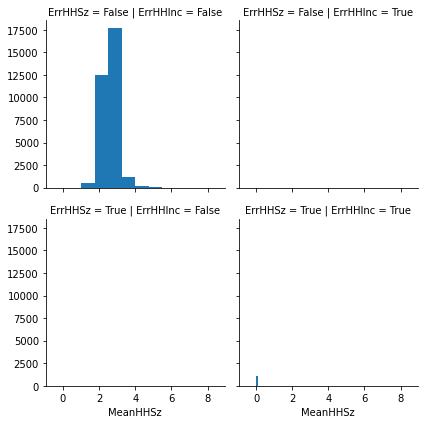

In [12]:
# create errornous index MeanHHSz
df['ErrHHSz'] = df['MeanHHSz'] < 1 

# create index for condition where Household income is zero
df['ErrHHInc'] = df['MedHHInc'] == 0 

x = sns.FacetGrid(df, col='ErrHHInc', row='ErrHHSz')
x = x.map(plt.hist, 'MeanHHSz')


In [13]:
print('ErrHHSz-ErrHHInc') 
print('False-False:', ((df['ErrHHSz'] == False) & (df['ErrHHInc'] == False)).sum()) 
print('False-True :', ((df['ErrHHSz'] == False) & (df['ErrHHInc'] == True)).sum()) 
print('True-False :', ((df['ErrHHSz'] == True) & (df['ErrHHInc'] == False)).sum()) 
print('True-True  :', ((df['ErrHHSz'] == True) & (df['ErrHHInc'] == True)).sum()) 

df[(df['ErrHHSz'] == True) & (df['ErrHHInc'] == False)]

ErrHHSz-ErrHHInc
False-False: 32078
False-True : 1
True-False : 18
True-True  : 1081


,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz,ErrHHSz,ErrHHInc
601,02661,-70.039606,41.675799,80.0,7,16250,0.88,True,False
6077,20139,-77.703610,38.651558,26.0,12,19643,0.80,True,False
6427,21627,-76.043210,38.176560,6.0,27,14531,0.93,True,False
7999,26268,-79.746748,38.780919,1.0,4,18750,0.67,True,False
8933,28702,-83.583958,35.412166,10.0,16,21250,0.80,True,False
8971,28749,-82.078996,35.849372,24.0,7,43750,0.88,True,False
9148,29338,-82.003280,35.136333,77.0,6,18750,0.75,True,False
12537,387XX,-90.875345,33.218772,1.0,5,3750,0.71,True,False
20413,59921,-113.885050,48.605472,1.0,1,85489,0.33,True,False
21726,628XX,-88.425855,38.263698,1.0,12,31250,0.92,True,False


In [14]:
# 0 Household income happens mainly (1081 observation) when household size is less than 1.
# there are 18 observations where the household income is not zero when household size is less than 1.
# considering every household should have at least one member, the mean of household size should be > 1
# and since there's only 18 of such observations out of 23000 observations, it's save to drop these observations
# hence, drop all observations with average household size less than 1 

df = df[~df['ErrHHSz']]

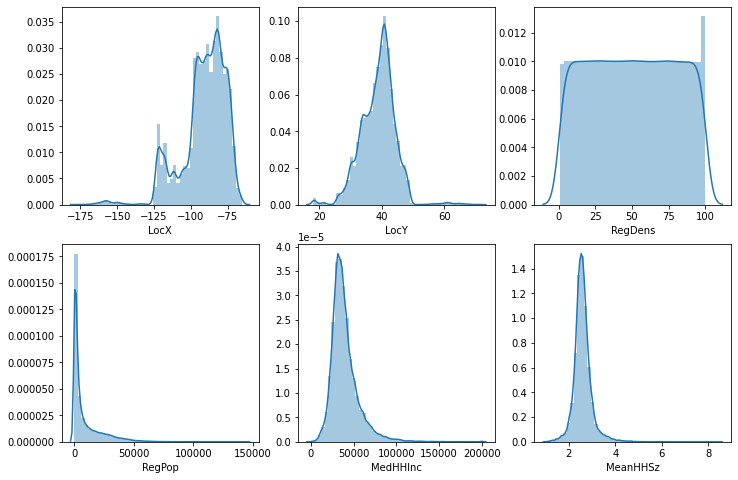

In [15]:
# check again on the distplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

sns.distplot(df['LocX'], ax=axes[0, 0])
sns.distplot(df['LocY'], ax=axes[0, 1])
sns.distplot(df['RegDens'], ax=axes[0, 2])
sns.distplot(df['RegPop'], ax=axes[1, 0])
sns.distplot(df['MedHHInc'], ax=axes[1, 1])
sns.distplot(df['MeanHHSz'], ax=axes[1, 2])

In [16]:
from mpl_toolkits.mplot3d import axes3d

<function matplotlib.pyplot.show(*args, **kw)>

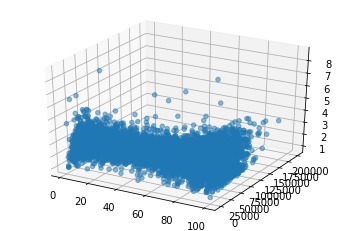

In [17]:
# visualize in 3d scatter plot 

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(df['RegDens'], df['MedHHInc'], df['MeanHHSz'], alpha = 0.5)
plt.show

In [18]:
# scale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df[['MedHHInc', 'MeanHHSz', 'RegDens']]),
    columns = ['MedHHInc', 'MeanHHSz', 'RegDens']
)
scaled_df

,MedHHInc,MeanHHSz,RegDens
0,-1.823978,1.703809,0.677603
1,-1.731970,1.339105,1.128561
2,-1.771086,0.661798,1.232628
3,-0.513284,1.078602,1.128561
4,-1.863648,1.599607,0.504157
...,...,...,...
32074,0.244250,0.948351,-1.195609
32075,-1.377773,-1.448275,-1.230298
32076,0.255321,-0.249962,-1.577189
32077,-0.112960,-1.161722,-1.681256


<function matplotlib.pyplot.show(*args, **kw)>

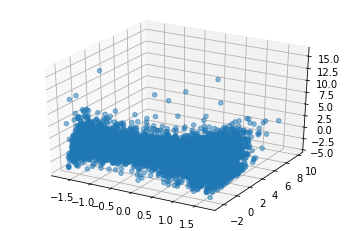

In [19]:
# visualize the scaled data in 3d scatter plot 

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(scaled_df['RegDens'], scaled_df['MedHHInc'], scaled_df['MeanHHSz'], alpha = 0.5)
plt.show

In [20]:
# fit the scaled data into clustering model
# try for 5 cluster

from sklearn.cluster import KMeans

model = KMeans(n_clusters=5, random_state=17)
model.fit(scaled_df)

# print centroid of each cluster
print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Centroid locations:
[-0.20201302 -0.58530473  1.02365786]
[-0.02117368  0.29688683 -0.17267456]
[-0.54395929 -0.44066577 -1.09072178]
[1.9466607  0.41650902 0.94144676]
[-0.3942097   2.602877    0.30663402]


In [21]:
# Assign cluster id to the data set using the clustering model

scaled_df['cluster_id'] = model.fit_predict(scaled_df)

<function matplotlib.pyplot.show(*args, **kw)>

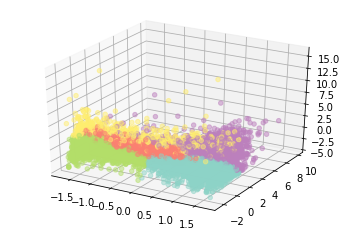

In [22]:
# visualize the scaled data in 3d scatter plot distinguish using cluster id with color

fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')
ax1.scatter(
    scaled_df['RegDens'], 
    scaled_df['MedHHInc'], 
    scaled_df['MeanHHSz'], 
    c = scaled_df['cluster_id'],
    cmap = 'Set3', 
    alpha = 0.5
)
plt.show

In [23]:
# counts of each cluster
scaled_df['cluster_id'].value_counts()

2    9601
1    9193
0    7683
3    3920
4    1682
Name: cluster_id, dtype: int64

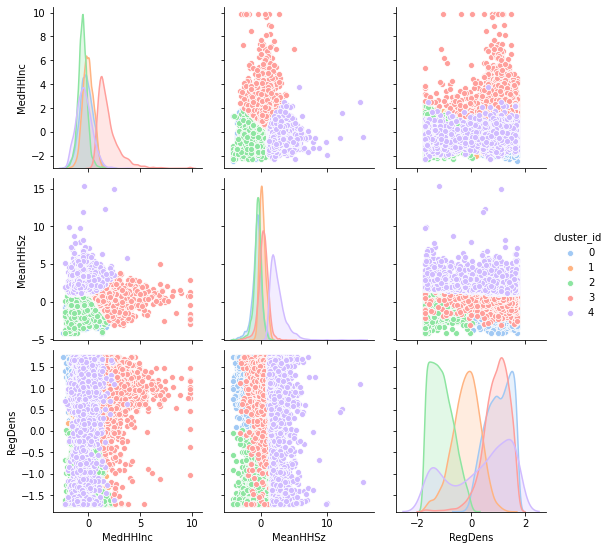

In [24]:
# visualize in pair plot
sns.pairplot(scaled_df, hue='cluster_id', palette = 'pastel')